In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.random import *
import pandas as pd


In [4]:
# csv取り込み
df = pd.read_csv("./tallWeight.csv", skiprows=1, names=('tall', 'weight'))
print(df)

     tall  weight
0    78.8    10.4
1    89.1    12.8
2    95.3    14.2
3   103.2    16.5
4   109.5    18.5
5   115.9    20.4
6   121.1    23.4
7   127.3    26.2
8   133.1    29.8
9   137.5    32.9
10  145.0    37.1
11  149.9    42.2
12  158.8    45.8
13  164.1    51.9
14  169.2    57.2


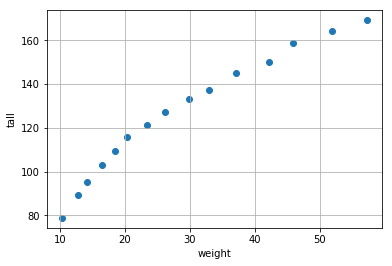

In [5]:
#身長と体重のグラフ
plt.scatter(df.weight, df.tall)
plt.xlabel('weight')
plt.ylabel('tall')
plt.grid(True)

[72.42553527  1.847068  ]


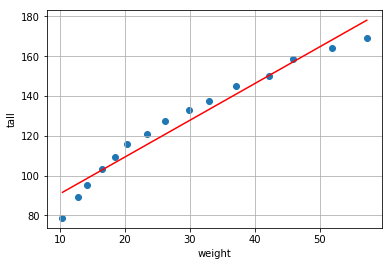

In [10]:
#Xを作成
dfWeight = df.weight
X = np.ones((dfWeight.size, 2))
for i in range(dfWeight.size):
    X[i, 1] = dfWeight[i]

#tを作成
t = df.tall

#wを求める
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), t)

#直線の式
Y = np.zeros((2, dfWeight.size))
for i in range(dfWeight.size):
    Y[0, i] = dfWeight[i]
    for j in range(2):
        if j == 0:
            Y[1, i] = w[0]
        else:
            Y[1, i] = Y[1, i] + w[j]*(dfWeight[i]**j)
print(w)
#図示
plt.scatter(df.weight, df.tall)
plt.plot(Y[0], Y[1], c='red')
plt.xlabel('weight')
plt.ylabel('tall')
plt.grid(True)


In [7]:
#16人目が40.7kgのとき、身長は？
weight = 40.7
tall = 0
for j in range(2):
        if j == 0:
            tall = w[0]
        else:
            tall = tall + w[j]*(weight**j)
print(tall)

147.60120273695122


[[1.00000000e+00 1.04000000e+01 1.08160000e+02 1.12486400e+03]
 [1.00000000e+00 1.28000000e+01 1.63840000e+02 2.09715200e+03]
 [1.00000000e+00 1.42000000e+01 2.01640000e+02 2.86328800e+03]
 [1.00000000e+00 1.65000000e+01 2.72250000e+02 4.49212500e+03]
 [1.00000000e+00 1.85000000e+01 3.42250000e+02 6.33162500e+03]
 [1.00000000e+00 2.04000000e+01 4.16160000e+02 8.48966400e+03]
 [1.00000000e+00 2.34000000e+01 5.47560000e+02 1.28129040e+04]
 [1.00000000e+00 2.62000000e+01 6.86440000e+02 1.79847280e+04]
 [1.00000000e+00 2.98000000e+01 8.88040000e+02 2.64635920e+04]
 [1.00000000e+00 3.29000000e+01 1.08241000e+03 3.56112890e+04]
 [1.00000000e+00 3.71000000e+01 1.37641000e+03 5.10648110e+04]
 [1.00000000e+00 4.22000000e+01 1.78084000e+03 7.51514480e+04]
 [1.00000000e+00 4.58000000e+01 2.09764000e+03 9.60719120e+04]
 [1.00000000e+00 5.19000000e+01 2.69361000e+03 1.39798359e+05]
 [1.00000000e+00 5.72000000e+01 3.27184000e+03 1.87149248e+05]]


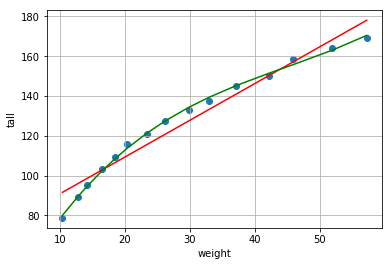

In [8]:
#Xを作成
dfWeight = df.weight
m = 3
X = np.ones((dfWeight.size, m + 1))

for i in range(dfWeight.size):
    for j in range(m):
        X[i, j + 1] = dfWeight[i] ** (j + 1)

print(X)

#tを作成
t = df.tall

#wを求める
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), t)

#近似式
Z = np.zeros((2, dfWeight.size))
for i in range(dfWeight.size):
    Z[0, i] = dfWeight[i]
    for j in range(m+1):
        if j == 0:
            Z[1, i] = w[0]
        else:
            Z[1, i] = Z[1, i] + w[j]*(dfWeight[i]**j)

    

#図示
plt.scatter(df.weight, df.tall)
plt.plot(Y[0], Y[1], c='red')
plt.plot(Z[0], Z[1], c='green')
plt.xlabel('weight')
plt.ylabel('tall')
plt.grid(True)


In [9]:
#16人目が35.6kgのとき、身長は？
weight = 35.6
tall = 0
for j in range(m+1):
        if j == 0:
            tall = w[0]
        else:
            tall = tall + w[j]*(weight**j)
print(tall)

143.20833796960784
